**TASK-4**

**TITLE: SPAM SMS DETECTION**

# Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam message

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# Importing dataset

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3753,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN
1183,ham,Am i that much bad to avoid like this?,NaN,NaN,NaN
1979,ham,Shhhhh nobody is supposed to know!,NaN,NaN,NaN
5549,ham,"You know, wot people wear. T shirts, jumpers, ...",NaN,NaN,NaN
2897,ham,If you r @ home then come down within 5 min,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df=df.iloc[:,[0,1]] # drop the last two na columns which are not useful for our task too
df.head(10)
df.columns = ['Spam or Ham','Text'] # rename columns
df.head()

,Spam or Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df. describe()

,Spam or Ham,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Visulazation

<ipython-input-10-92ba4d7193bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=df["Spam or Ham"], palette=cols, edgecolor="black")


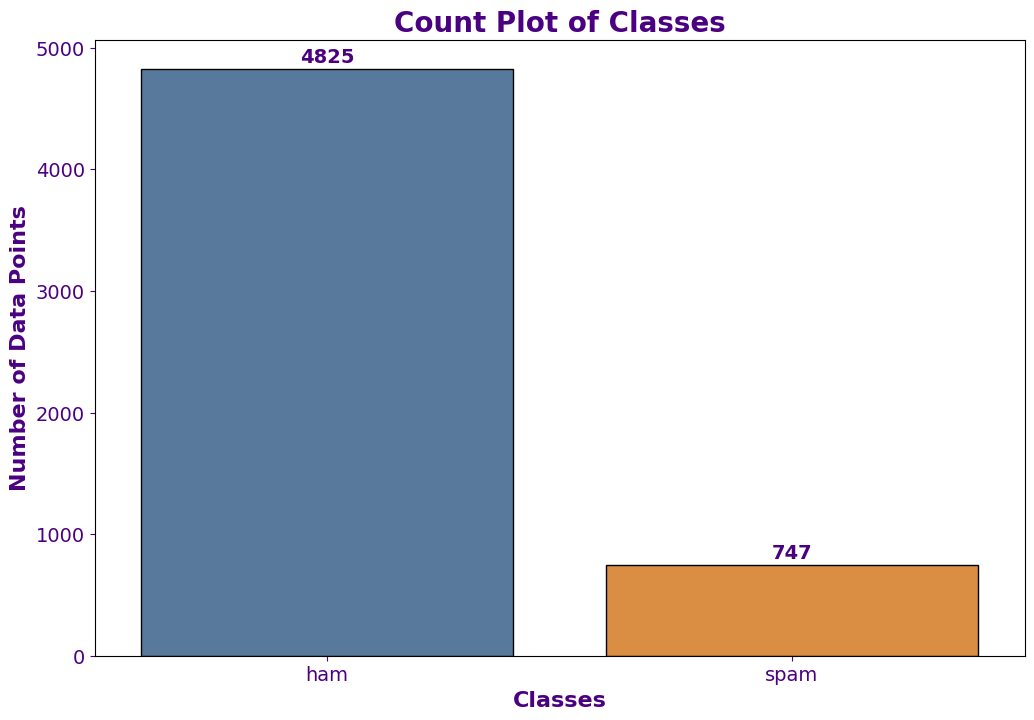

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib library
import seaborn as sns # Import seaborn for enhanced visualizations

cols = ["#4E79A7", "#F28E2B"]  # Blue and orange colors

# Evaluate the target and find out if our data is balanced
plt.figure(figsize=(12, 8))

# Create the count plot
fg = sns.countplot(x=df["Spam or Ham"], palette=cols, edgecolor="black")

# Set the title and labels
fg.set_title("Count Plot of Classes", color="#4B0082", fontsize=20, fontweight='bold')
fg.set_xlabel("Classes", color="#4B0082", fontsize=16, fontweight='bold')
fg.set_ylabel("Number of Data Points", color="#4B0082", fontsize=16, fontweight='bold')

# Customize the tick parameters for better readability
fg.tick_params(axis='x', colors='#4B0082', labelsize=14)
fg.tick_params(axis='y', colors='#4B0082', labelsize=14)

# Add value labels on the bars
for p in fg.patches:
    fg.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                color="#4B0082", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

<ipython-input-11-4f60b4905079>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')


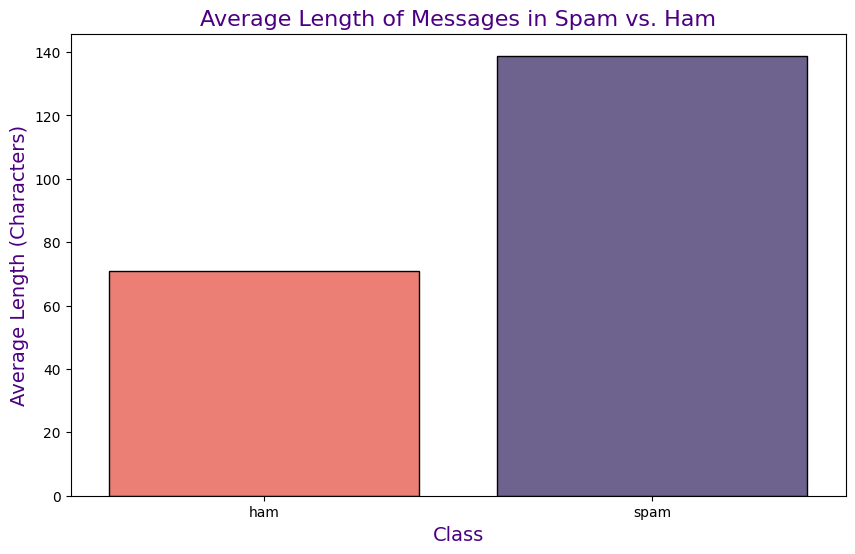

In [ ]:
palette = ["#FF6F61", "#6B5B95"]

# Add a column for the length of the text
df['Text_Length'] = df['Text'].apply(len)

# Calculate the average length of messages per class
average_length = df.groupby('Spam or Ham')['Text_Length'].mean().reset_index()

# Plot the average length of messages
plt.figure(figsize=(10, 6))
sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')
plt.title('Average Length of Messages in Spam vs. Ham', fontsize=16, color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Average Length (Characters)', fontsize=14, color='#4B0082')
plt.show()

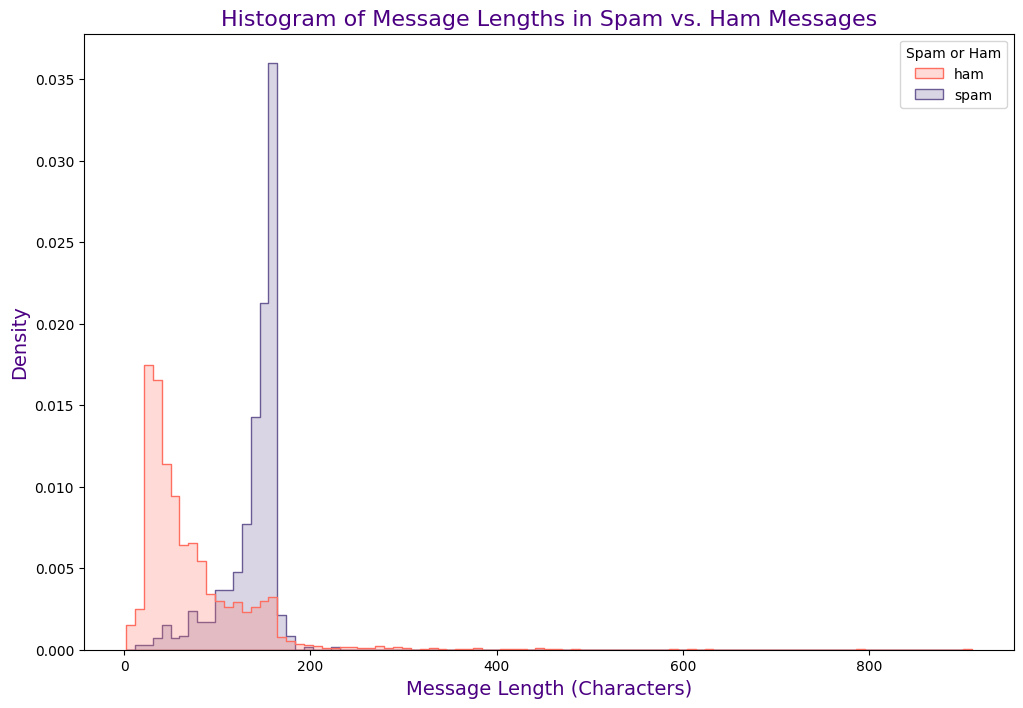

In [ ]:
# Plot histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Text_Length', hue='Spam or Ham', palette=palette, element='step', stat='density', common_norm=False)
plt.title('Histogram of Message Lengths in Spam vs. Ham Messages', fontsize=16, color='#4B0082')
plt.xlabel('Message Length (Characters)', fontsize=14, color='#4B0082')
plt.ylabel('Density', fontsize=14, color='#4B0082')
plt.show()

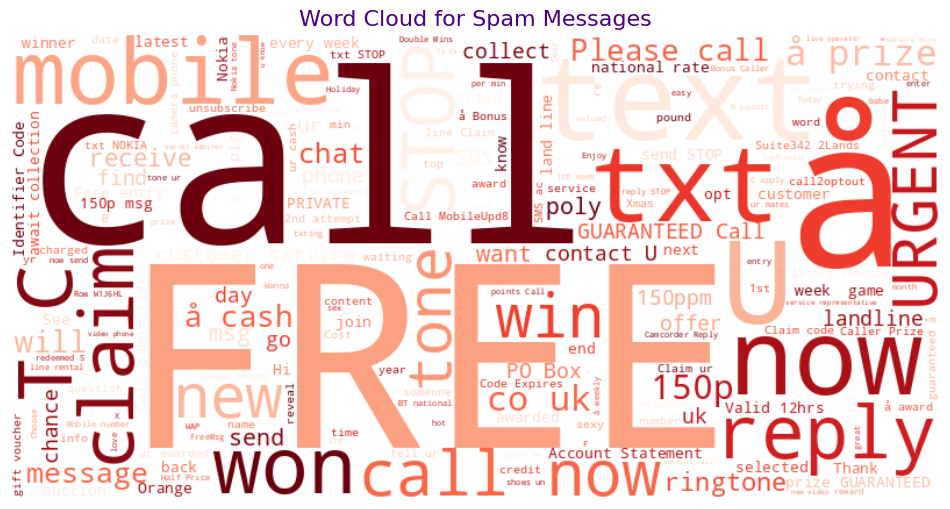

In [ ]:
from wordcloud import WordCloud

# Filter spam messages
spam_texts = ' '.join(df[df['Spam or Ham'] == 'spam']['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#4B0082')
plt.show()


In [ ]:
x = np.array(df['Text'])  # Assuming 'Text' is the column containing the SMS messages
y = np.array(df['Spam or Ham'])  # Assuming 'Spam or Ham' is the column for labels

In [ ]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

# spilit the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=51)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import the TfidfVectorizer class

tfidf = TfidfVectorizer()
X_tfidf_train = tfidf.fit_transform(X_train)
X_tfidf_test = tfidf.transform(X_test)

In [ ]:
X_tfidf_train

<4457x7705 sparse matrix of type '<class 'numpy.float64'>'
	with 58836 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_tfidf_train, Y_train)

# Make predictions on the validation set
y_pred_lr = classifier.predict(X_tfidf_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, y_pred_lr)
print("test Accuracy using logistic regression:", accuracy)

test Accuracy using logistic regression: 0.9713004484304932


In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_tfidf_train, Y_train)
y_pred_svc = model_svc.predict(X_tfidf_test)

# Evaluate the performance of the model
accuracy_svc = accuracy_score(Y_test, y_pred_svc)
print("test Accuracy using svm:", accuracy_svc)

test Accuracy using svm: 0.9820627802690582


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(X_tfidf_train, Y_train)
y_pred_nb = nb_classifier.predict(X_tfidf_test)

# Evaluate the performance of the model
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print(" Accuracy of multinomialNB :", accuracy_nb)

 Accuracy of multinomialNB : 0.95695067264574


In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix # Import confusion_matrix

print(classification_report(Y_test, y_pred_svc))
print("Confusion Matrix")
cm=confusion_matrix(Y_test, y_pred_svc)
print(cm)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       962
        spam       0.99      0.88      0.93       153

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix
[[961   1]
 [ 19 134]]


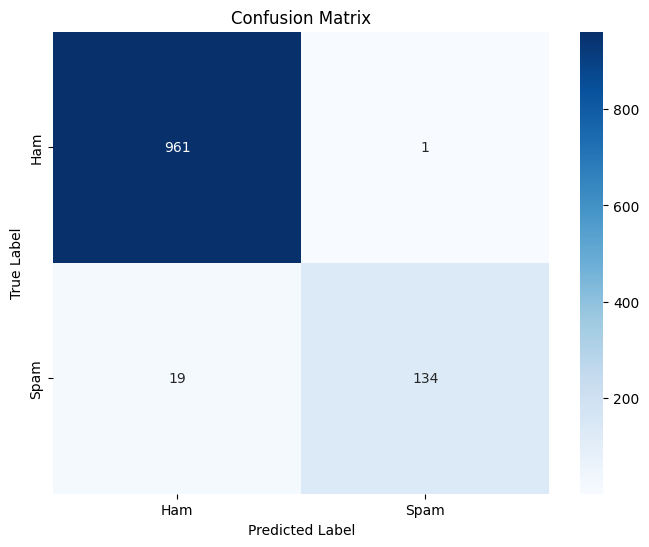

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 Naive Bayes is generally the preferred model due to its balance of simplicity, efficiency, and effectiveness. Logistic Regression is also a strong alternative, particularly if interpretability is important. SVM can provide high accuracy but may not justify the increased computational cost for this specific task.